In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\tonyb\Documents\BOSCOBRAND GIT\GITHUB\Marketing_KPI_Project\data\bank-additional\bank-full.csv', sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df['conversion']=df['y'].apply(lambda x: 1 if x == 'yes'else 0)

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,conversion
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


**AGGREGATE CONVERSION RATE**

In [9]:
#total number of conversions
df.conversion.sum()

5289

In [10]:
#total number of clients in the data
df.shape[0]

45211

In [11]:
print('total conversions:%i out of %i'% (df.conversion.sum(),df.shape[0]))

total conversions:5289 out of 45211


In [12]:
print('conversion rate: %0.2f%%' % ((df.conversion.sum()/df.shape[0])*100.0))

conversion rate: 11.70%


**CONVERSION RATES BY AGE**

In [13]:
conversions_by_age = df.groupby (
    by='age'
)['conversion'].sum() / df.groupby (
    by='age'
)['conversion'].count() * 100.0

In [14]:
conversions_by_age

age
18     58.333333
19     31.428571
20     30.000000
21     27.848101
22     31.007752
         ...    
90    100.000000
92    100.000000
93    100.000000
94      0.000000
95     50.000000
Name: conversion, Length: 77, dtype: float64

**VISUALIZATION: CONVERSION RATES BY AGE**

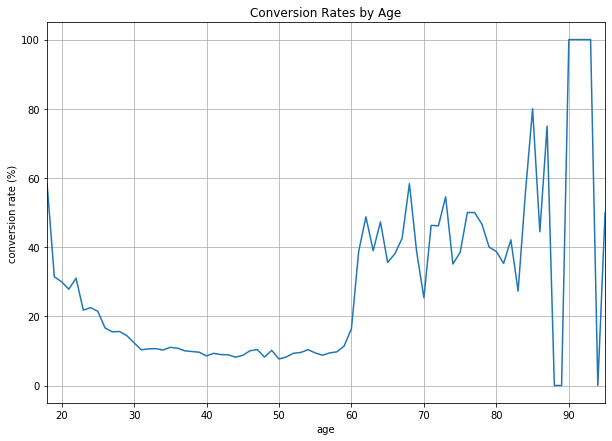

In [15]:
ax = conversions_by_age.plot(
    grid=True,
    figsize=(10,7),
    title='Conversion Rates by Age'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

**CONVERSIONS BY AGE GROUP**

In [16]:
df['age_group'] = df['age'].apply(
lambda x: '[18, 30)' if x < 30 else '[30, 40)' if x < 40 \
    else '[40, 50)' if x < 50 else '[50, 60)' if x < 60 \
    else '[60, 70)' if x < 70 else '70+'
)

In [17]:
conversions_by_age_group = df.groupby (
    by='age_group'
)['conversion'].sum() / df.groupby (
    by='age_group'
)['conversion'].count() * 100.0

In [18]:
conversions_by_age_group

age_group
70+         42.418773
[18, 30)    17.599090
[30, 40)    10.575488
[40, 50)     9.120549
[50, 60)     9.334126
[60, 70)    29.674797
Name: conversion, dtype: float64

**VISUALIZATION: CONVERSION RATES BY AGE GROUP**

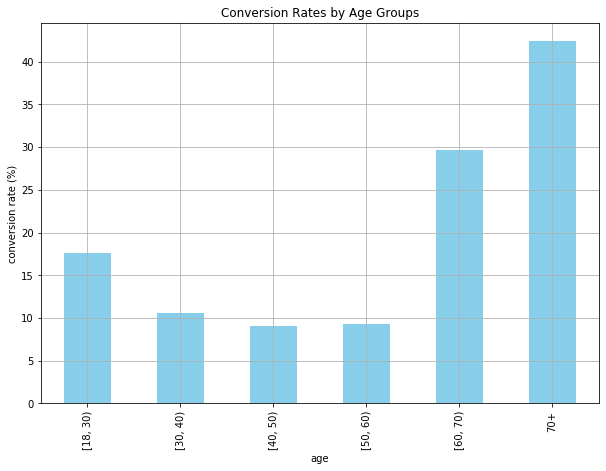

In [19]:
ax=conversions_by_age_group.reindex(
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
).plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10,7),
    title='Conversion Rates by Age Groups'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()




**CONVERSIONS VERSUS NON-CONVERSIONS BASED ON MARITAL STATUS**

In [20]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,conversion,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,"[50, 60)"
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,"[40, 50)"
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,"[30, 40)"
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,"[40, 50)"
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,"[30, 40)"


In [21]:
conversions_by_marital_status=pd.pivot_table(df,values='y', index='marital', columns='conversion', aggfunc=len)

In [22]:
conversions_by_marital_status.columns = ['non_conversions', 'conversions']

In [23]:
conversions_by_marital_status

,non_conversions,conversions
marital,,
divorced,4585,622
married,24459,2755
single,10878,1912


<function matplotlib.pyplot.show(*args, **kw)>

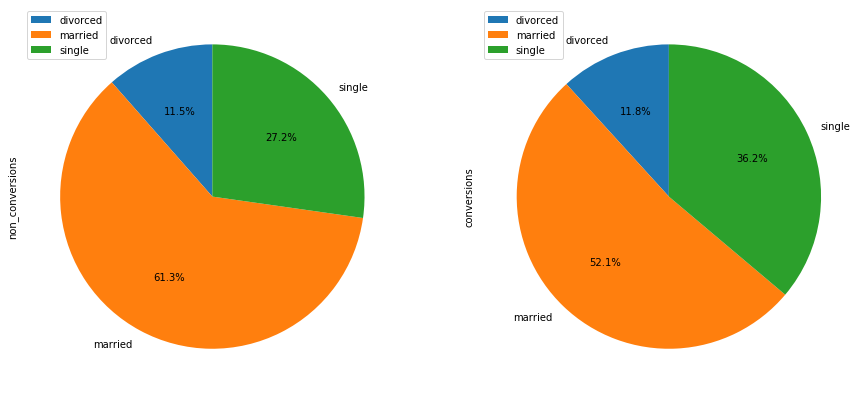

In [24]:
conversions_by_marital_status.plot(
    kind='pie',
    figsize=(15,7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show

**CONVERSIONS BY AGE AND MARITAL STATUS**

In [25]:
age_marital_df=df.groupby(['age_group','marital'])['conversion'].sum().unstack('marital').fillna(0)

In [26]:
age_marital_df = age_marital_df.divide(
    df.groupby(
        by='age_group'
    )['conversion'].count(),axis=0
)

In [27]:
age_marital_df

marital,divorced,married,single
age_group,,,
70+,0.099278,0.319495,0.005415
"[18, 30)",0.002086,0.023326,0.150578
"[30, 40)",0.008735,0.050473,0.046548
"[40, 50)",0.015015,0.058172,0.018018
"[50, 60)",0.019025,0.068014,0.006302
"[60, 70)",0.051220,0.237398,0.008130


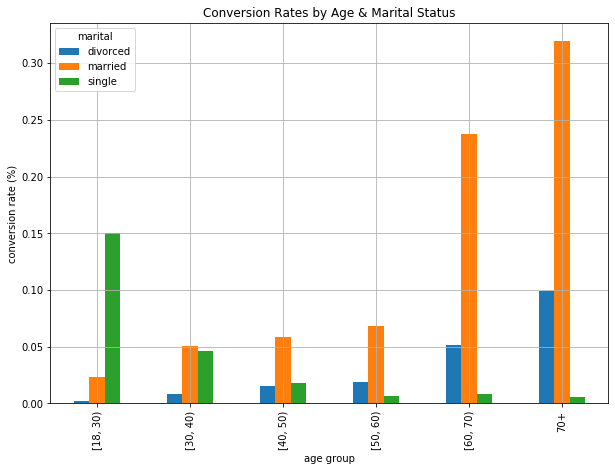

In [28]:
ax=age_marital_df.reindex(
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
).plot(
    kind='bar',
    grid=True,
    figsize=(10,7),
    title='Conversion Rates by Age & Marital Status'
)

ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()




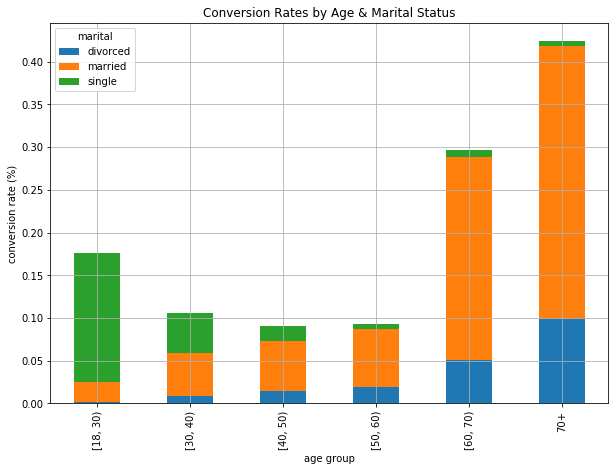

In [29]:
ax=age_marital_df.reindex(
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
).plot(
    kind='bar',
    stacked=True,
    grid=True,
    figsize=(10,7),
    title='Conversion Rates by Age & Marital Status'
)

ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()
